In [4]:
from lib import Augmentation_methods
from lib import data_preparation

In [5]:
# All used imports
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

from lib import Augmentation_methods

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from IPython.display import clear_output

from scipy.signal import stft

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from pathlib import Path
import datetime
import glob as gl

## Real Data [206 B]

In [304]:
df_real_data = data_preparation.load_real_data(room="206 B",year=2022, month=11, day=13, startHour=12,lastHour=14)
df_real_data

5738070 rows from filepath: 2022-11-13_12-00-00
5696160 rows from filepath: 2022-11-13_13-00-00
5740890 rows from filepath: 2022-11-13_14-00-00


,z,time
0,1014,2022-11-13 12:00:00.000000
1,1018,2022-11-13 12:00:00.000625
2,1020,2022-11-13 12:00:00.001250
3,1018,2022-11-13 12:00:00.001875
4,1020,2022-11-13 12:00:00.002500
...,...,...
17175115,1018,2022-11-13 14:59:48.053125
17175116,1018,2022-11-13 14:59:48.053750
17175117,1019,2022-11-13 14:59:48.054375
17175118,1017,2022-11-13 14:59:48.055000


In [305]:
df_segmented = data_preparation.shifting_window_segmentation(df_real_data,stepsize= 5)
df_segmented

,left_t,right_t,z,features
0,2022-11-13 12:00:00.000000,2022-11-13 12:00:10.000000,"[1014, 1018, 1020, 1018, 1020, 1020, 1014, 101...","[[3719263.39772316, 2.3690981601563283, 1039.8..."
1,2022-11-13 12:00:05.000000,2022-11-13 12:00:15.000000,"[1020, 1020, 1018, 1018, 1016, 1016, 1018, 101...","[[41.623465140625456, 2.3974651406248904, 2.94..."
2,2022-11-13 12:00:10.000000,2022-11-13 12:00:20.000000,"[1018, 1016, 1017, 1016, 1020, 1022, 1020, 102...","[[41.32320159765557, 2.470201597656416, 2.9493..."
3,2022-11-13 12:00:15.000000,2022-11-13 12:00:25.000000,"[1020, 1018, 1020, 1017, 1015, 1018, 1014, 101...","[[71.20195351562523, 2.4394535156249573, 2.969..."
4,2022-11-13 12:00:20.000000,2022-11-13 12:00:30.000000,"[1018, 1018, 1018, 1018, 1018, 1017, 1018, 101...","[[70.58520225000093, 1.9642022500001555, 2.967..."
...,...,...,...,...
2140,2022-11-13 14:59:13.606250,2022-11-13 14:59:23.606250,"[1018, 1018, 1016, 1016, 1018, 1016, 1020, 102...","[[69.45972306249996, 1.7802230624999926, 2.929..."
2141,2022-11-13 14:59:18.606250,2022-11-13 14:59:28.606250,"[1018, 1016, 1017, 1018, 1016, 1018, 1018, 102...","[[69.28793550390719, 1.7528105039063993, 2.974..."
2142,2022-11-13 14:59:23.606250,2022-11-13 14:59:33.606250,"[1020, 1016, 1015, 1020, 1016, 1020, 1020, 101...","[[68.9969039414065, 1.7067789414062904, 2.9949..."
2143,2022-11-13 14:59:28.606250,2022-11-13 14:59:38.606250,"[1018, 1016, 1018, 1017, 1018, 1018, 1020, 102...","[[68.15844003515703, 1.5770650351563689, 3.032..."


In [306]:
# df_segmented_real= df_segmented[(df_segmented['left_t'] >= '2022-10-14 18:43:00') & (df_segmented['right_t'] <= '2022-10-14 18:46:00')]
# df_segmented_real

In [307]:
Real_Events = []
for i in range(len(df_segmented)):
    Real_Events.append(df_segmented["features"].iloc[i].flatten())

In [308]:
len(Real_Events)

2145

# 1. Logistische Regression

### Training

In [11]:
fake_lab_data = data_preparation.fake_lab_data()
fake_data = fake_lab_data[0]
All_Events = fake_lab_data[1]
All_Labels = fake_lab_data[2]

/home/ing2146/Final/SNEHA/lib/data_preparation.py:202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  All_Events_Data = np.array(All_Events_Data)[shuffler]
/home/ing2146/Final/SNEHA/lib/data_preparation.py:226: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_fake_dummy_Data = np.array(df_fake_dummy_Data)


In [12]:
x = All_Events
y = All_Labels

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y.ravel(), test_size=0.2)
lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
pd.crosstab(lr.predict(x_test), y_test)

col_0,0,1
row_0,,
0,3989,0
1,0,227


In [309]:
prediction = lr.predict(Real_Events)

In [310]:
 len(prediction[prediction == 1])

605

In [311]:
df_segmented["predicted"] = prediction

In [312]:
df_segmented

,left_t,right_t,z,features,predicted
0,2022-11-13 12:00:00.000000,2022-11-13 12:00:10.000000,"[1014, 1018, 1020, 1018, 1020, 1020, 1014, 101...","[[3719263.39772316, 2.3690981601563283, 1039.8...",1
1,2022-11-13 12:00:05.000000,2022-11-13 12:00:15.000000,"[1020, 1020, 1018, 1018, 1016, 1016, 1018, 101...","[[41.623465140625456, 2.3974651406248904, 2.94...",0
2,2022-11-13 12:00:10.000000,2022-11-13 12:00:20.000000,"[1018, 1016, 1017, 1016, 1020, 1022, 1020, 102...","[[41.32320159765557, 2.470201597656416, 2.9493...",0
3,2022-11-13 12:00:15.000000,2022-11-13 12:00:25.000000,"[1020, 1018, 1020, 1017, 1015, 1018, 1014, 101...","[[71.20195351562523, 2.4394535156249573, 2.969...",0
4,2022-11-13 12:00:20.000000,2022-11-13 12:00:30.000000,"[1018, 1018, 1018, 1018, 1018, 1017, 1018, 101...","[[70.58520225000093, 1.9642022500001555, 2.967...",0
...,...,...,...,...,...
2140,2022-11-13 14:59:13.606250,2022-11-13 14:59:23.606250,"[1018, 1018, 1016, 1016, 1018, 1016, 1020, 102...","[[69.45972306249996, 1.7802230624999926, 2.929...",0
2141,2022-11-13 14:59:18.606250,2022-11-13 14:59:28.606250,"[1018, 1016, 1017, 1018, 1016, 1018, 1018, 102...","[[69.28793550390719, 1.7528105039063993, 2.974...",0
2142,2022-11-13 14:59:23.606250,2022-11-13 14:59:33.606250,"[1020, 1016, 1015, 1020, 1016, 1020, 1020, 101...","[[68.9969039414065, 1.7067789414062904, 2.9949...",0
2143,2022-11-13 14:59:28.606250,2022-11-13 14:59:38.606250,"[1018, 1016, 1018, 1017, 1018, 1018, 1020, 102...","[[68.15844003515703, 1.5770650351563689, 3.032...",0


In [ ]:
for i, event in enumerate(Real_Events):
    if ((df_segmented['predicted'].iloc[i]) == 1):
            data_preparation.stft_plot(label = "real fall" + str(i), data = df_segmented['z'].iloc[i])
    else:
        continue
    

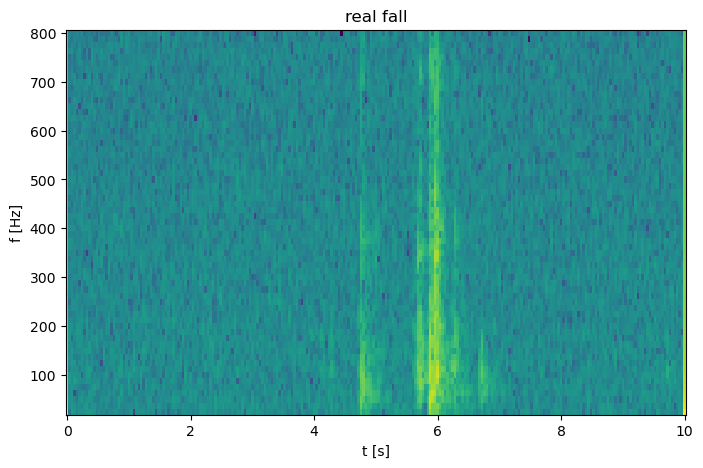

In [314]:
data_preparation.stft_plot(label = "real fall", data = df_segmented['z'].iloc[588])